In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import h5py
import scipy
import sklearn
from google.colab import drive
drive.mount('/content/drive')

pathTrain1 = "/content/drive/MyDrive/3_Cisc484_MachineLearning/train_1.pkl"
pathTest1 = "/content/drive/MyDrive/3_Cisc484_MachineLearning/test_1.pkl"
pathTrain2 = "/content/drive/MyDrive/3_Cisc484_MachineLearning/train_2.pkl"
pathTest2 = "/content/drive/MyDrive/3_Cisc484_MachineLearning/test_2.pkl"
pathTrain3 = "/content/drive/MyDrive/3_Cisc484_MachineLearning/train_3.pkl"
pathTest3 = "/content/drive/MyDrive/3_Cisc484_MachineLearning/test_3.pkl"

Mounted at /content/drive


In [3]:
import pickle
pkl_file = open(pathTrain1, 'rb')
train1Data = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(pathTest1, 'rb')
test1Data = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(pathTrain2, 'rb')
train2Data = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(pathTest2, 'rb')
test2Data = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(pathTrain3, 'rb')
train3Data = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(pathTest3, 'rb')
test3Data = pickle.load(pkl_file)
pkl_file.close()


#print(data.shape)  # 614 samples, 8 attributes, 1 label
#print(data[:3])  # see the first 3 samples

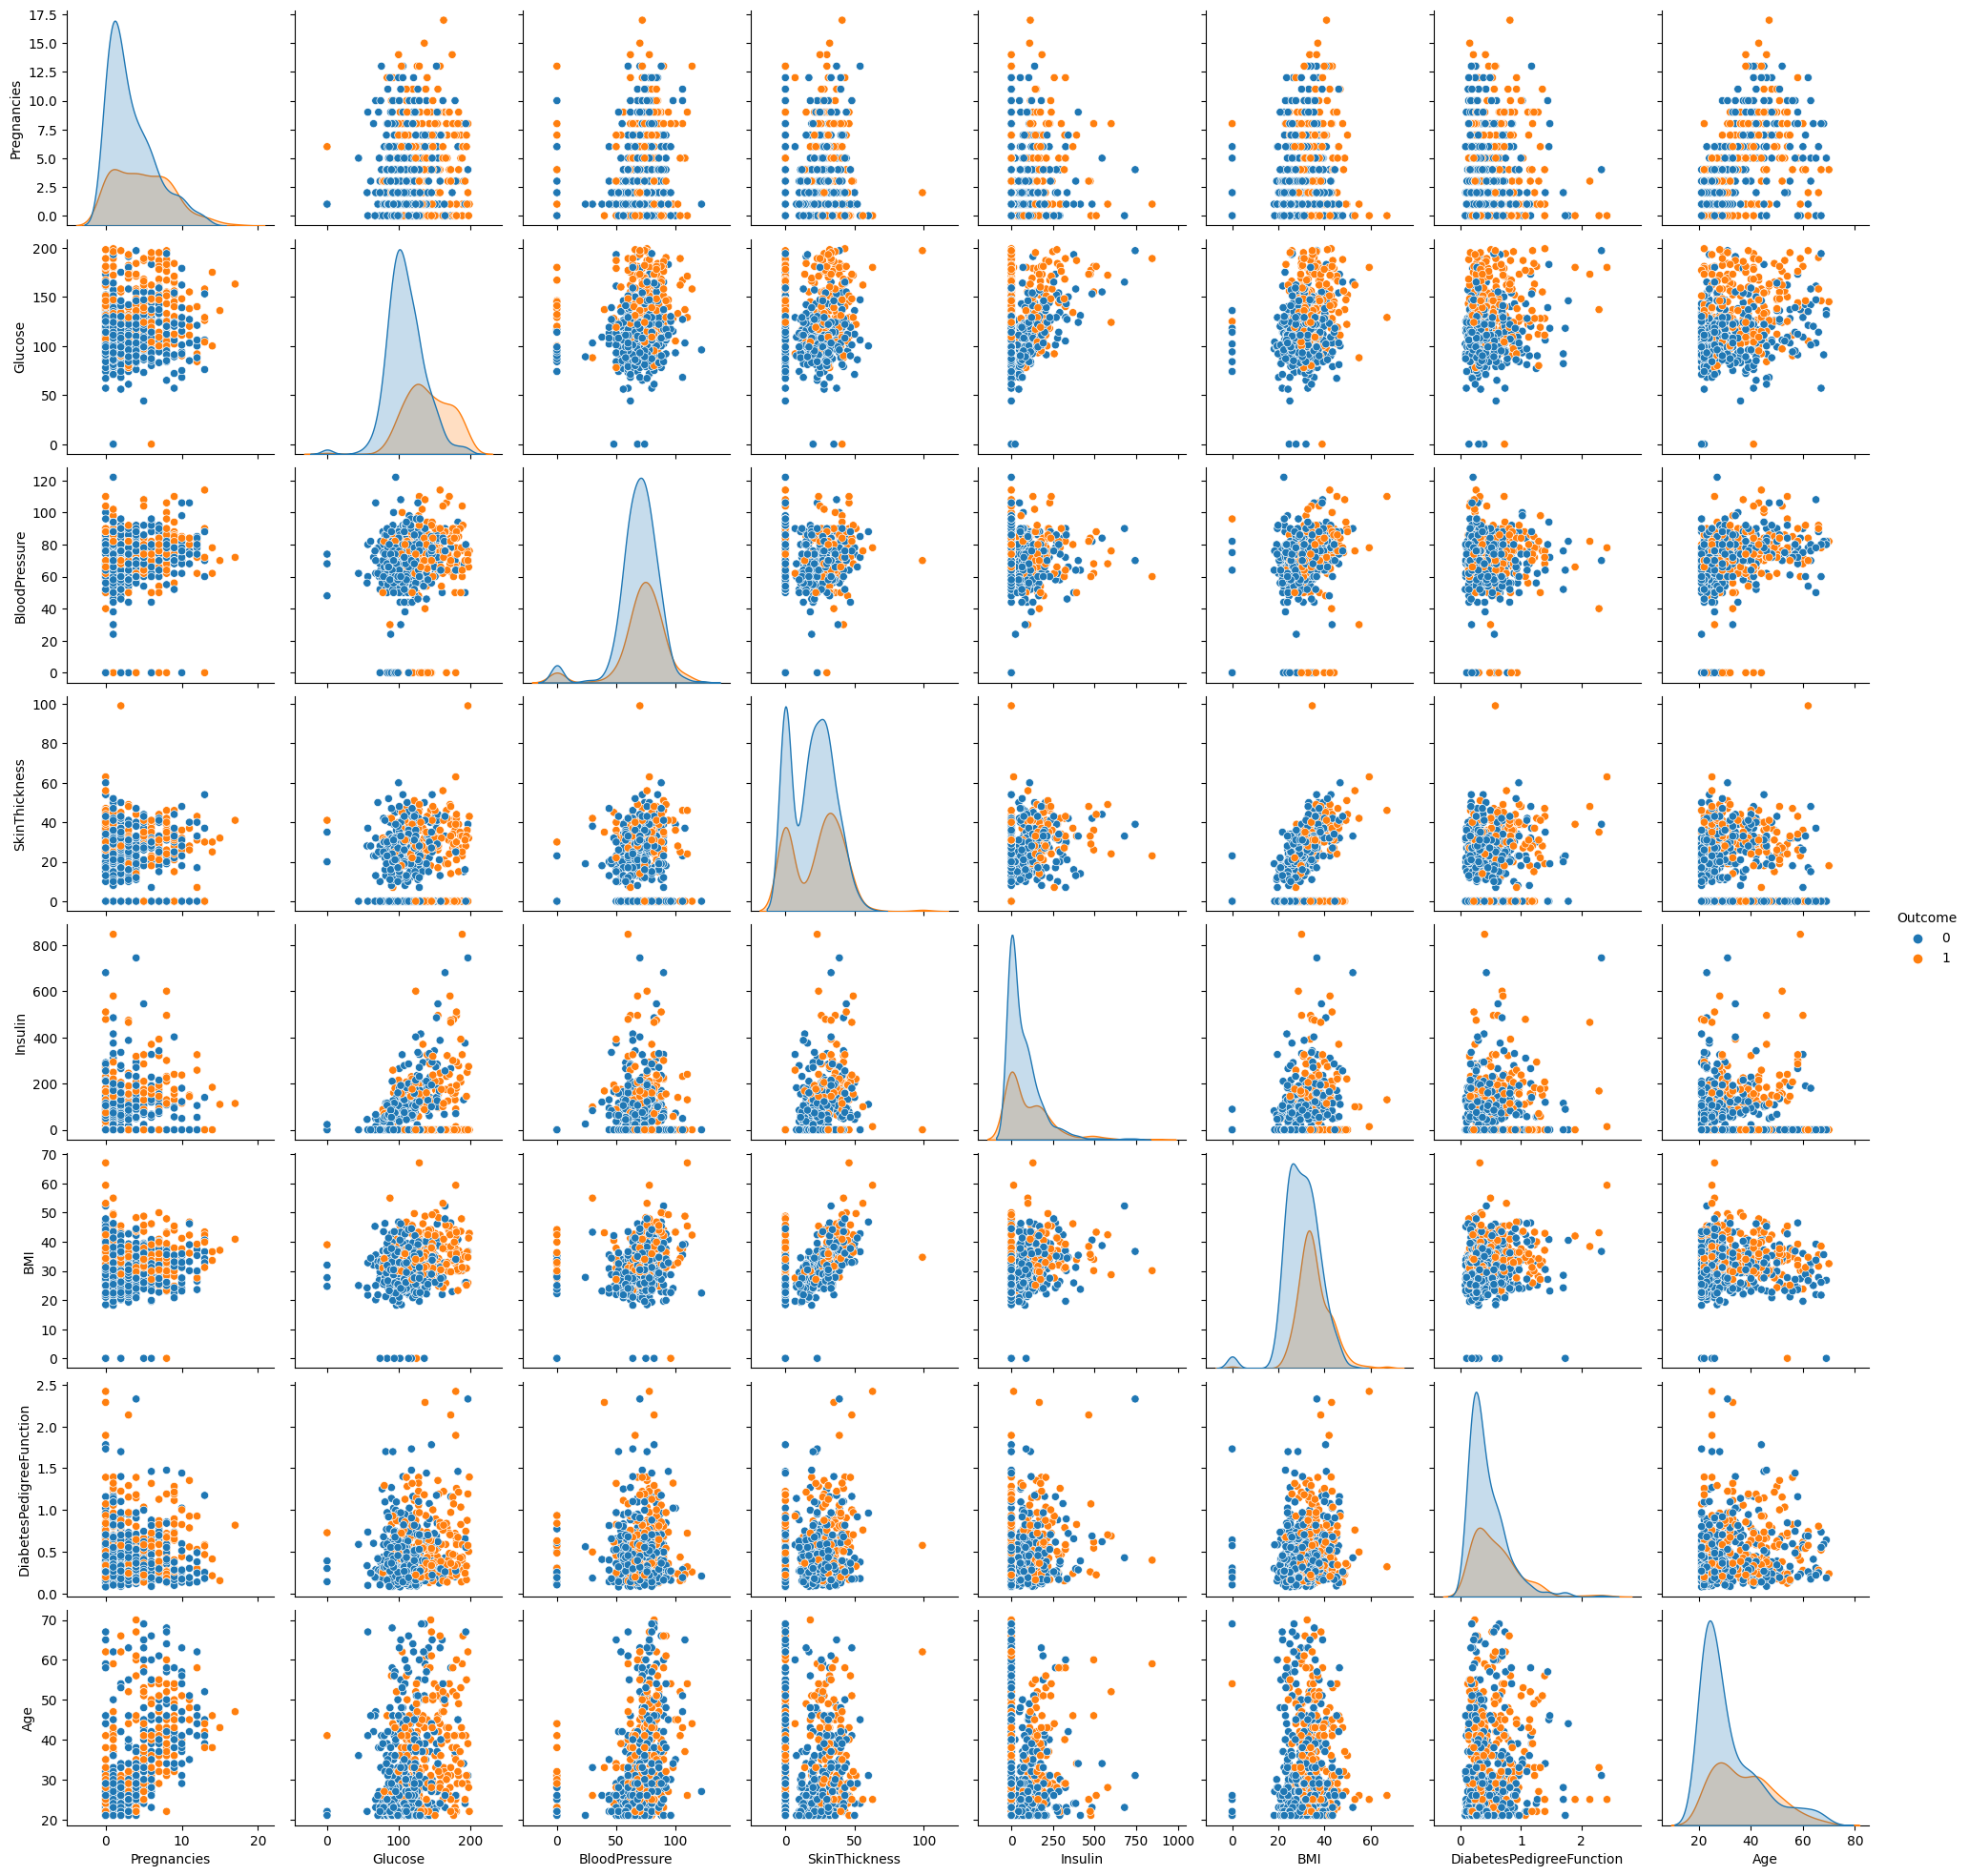

In [18]:
import seaborn as sns
sns.pairplot(train1Data, hue='Outcome')
plt.show()

**Problem 3a**

In [4]:
from sklearn.linear_model import LogisticRegression

print(train1Data.columns)

attributes = train1Data.columns[:8]
print("Atrributes: ", attributes)

# Outcome values for Training
trainOutcomeVals = train1Data.Outcome

# Data for Training (excluding outcome)
trainDataVals = train1Data[attributes]


# Outcome values for Testing
testOutcomeVals = test1Data.Outcome

# Data for Training (excluding outcome)
testDataVals = test1Data[attributes]



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Atrributes:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [22]:
model = LogisticRegression(fit_intercept=True, C=1.0, max_iter=200)

# Fit the model
model.fit(trainDataVals, trainOutcomeVals)

# Make predictions on new instances
predicted_data = model.predict(testDataVals)
print("Output Predictions: ", predicted_data)

# Model Evaluation
from sklearn import metrics as mt

print("1) The model explains,", np.round(mt.explained_variance_score(testOutcomeVals, predicted_data)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(testOutcomeVals, predicted_data),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(testOutcomeVals,predicted_data),2))

c = np.round(mt.r2_score(testOutcomeVals,predicted_data),2)
print(c)

Output Predictions:  [0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0]
1) The model explains, 11.7 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 0.22
3) The R-Square score of the model is  0.07
0.07


In [6]:
# Model Coefficients
print("Weights and Wald values: ")
print('coefficient', model.coef_)
print('intercept', model.intercept_)

Weights and Wald values: 
coefficient [[ 0.11104375  0.03522814 -0.01302573  0.007436   -0.00166058  0.08983161
   0.90079558  0.02016504]]
intercept [-8.70662234]


In [ ]:
'''
 Which attribute/feature seems to have the greatest impact on the prediction?

 --> DiabetesPedigreeFunction since its weight is the largest.
'''

**Problem 3b**

In [7]:
print(train2Data.columns)

attributes2 = train2Data.columns[:9]
print("Attributes2: ", attributes2)

# Outcome values for Training
train2OutcomeVals = train2Data.Outcome

# Data for Training (excluding outcome)
train2DataVals = train2Data[attributes2]


# Outcome values for Testing
test2OutcomeVals = test2Data.Outcome

# Data for Training (excluding outcome)
test2DataVals = test2Data[attributes2]

Index(['Pregnancies', 'X', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Attributes2:  Index(['Pregnancies', 'X', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [21]:
model2 = LogisticRegression(fit_intercept=True, C=1.0, max_iter=200)

# Fit the model
model2.fit(train2DataVals, train2OutcomeVals)

# Make predictions on new instances
predicted_data2 = model2.predict(test2DataVals)
print("Output Predictions: ", predicted_data2)

print(len(predicted_data2))


# Model Evaluation

print("1) The model explains,", np.round(mt.explained_variance_score(test2OutcomeVals, predicted_data2)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model2 is:", np.round(mt.mean_absolute_error(test2OutcomeVals, predicted_data2),2))
print("3) The R-Square score of the model2 is " , np.round(mt.r2_score(test2OutcomeVals,predicted_data2),2))

c2 = np.round(mt.r2_score(test2OutcomeVals,predicted_data2),2)
print(c2)

Output Predictions:  [1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]
154
1) The model explains, 11.75 % variance of the target w.r.t features is
2) The Mean Absolute Error of model2 is: 0.18
3) The R-Square score of the model2 is  0.1
0.1


In [10]:
# Model Coefficients
print("Weights and Wald values: ")
print('coefficient', model2.coef_)
print('intercept', model2.intercept_)

Weights and Wald values: 
coefficient [[ 0.14220078  0.01689608  0.01689608 -0.01425193 -0.00339543 -0.00128844
   0.10147596  0.91235762  0.00649445]]
intercept [-8.17933296]


In [15]:
if predicted_data.all() == predicted_data2.all():
  print("Predicted Data 1 is equal to Predicted Data 2")

Predicted Data 1 is equal to Predicted Data 2


In [11]:
'''
What do you observe about the first (the new feature) feature’s weight and that of others.
Explain what you observe and why you obtain the same predicted values.

The new feature is X. This feature's weight is 0.01689608. This weight is equal to Glucose's weight which is also 0.01689608.
The some of the other weights are negative which are BloodPressure, SkinThickness, and Insulin.
And some weights are greater than or less than X's weight which are Pregnancies, BMI, DiabetesPedigreeFunction, and Age

I obtained the same predicted values for the Predicted Data 1 and Predicted Data 2.
This is because the accuracies of Model 1 and Model 2 are very similar.
'''

"\nWhat do you observe about the first (the new feature) feature’s weight and that of others. \nExplain what you observe and why you obtain the same predicted values.\n\nThe new feature is X. This feature's weight is 0.01689608. This weight is equal to Glucose's weight which is also 0.01689608.\nThe some of the other weights are negative which are BloodPressure, SkinThickness, and Insulin.\nAnd some weights are greater than or less than X's weight which are Pregnancies, BMI, DiabetesPedigreeFunction, and Age\n\nI obtained the same predicted values because the weights of X and Glucose are the same, \nthus the predicted values for both would result in the same thing,  \n"

**Problem 3c**

In [12]:
print(train3Data.columns)

attributes3 = train3Data.columns[:9]
print("Attributes3: ", attributes3)

# Outcome values for Training
train3OutcomeVals = train3Data.Outcome

# Data for Training (excluding outcome)
train3DataVals = train3Data[attributes3]


# Outcome values for Testing
test3OutcomeVals = test3Data.Outcome

# Data for Training (excluding outcome)
test3DataVals = test3Data[attributes3]

Index(['Pregnancies', 'X', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Attributes3:  Index(['Pregnancies', 'X', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [13]:
model3 = LogisticRegression(fit_intercept=True, C=1.0, max_iter=200)

# Fit the model
model3.fit(train3DataVals, train3OutcomeVals)

# Make predictions on new instances
predicted_data3 = model3.predict(test3DataVals)
print("Output Predictions: ", predicted_data3)

# Model Evaluation

print("1) The model explains,", np.round(mt.explained_variance_score(test3OutcomeVals, predicted_data3)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model2 is:", np.round(mt.mean_absolute_error(test3OutcomeVals, predicted_data3),2))
print("3) The R-Square score of the model2 is " , np.round(mt.r2_score(test3OutcomeVals,predicted_data3),2))

c3 = np.round(mt.r2_score(test3OutcomeVals,predicted_data3),2)
print(c3)

Output Predictions:  [1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 0]
1) The model explains, -18.48 % variance of the target w.r.t features is
2) The Mean Absolute Error of model2 is: 0.28
3) The R-Square score of the model2 is  -0.19
-0.19


In [14]:
# Model Coefficients
print("Weights and Wald values: ")
print('coefficient', model3.coef_)
print('intercept', model3.intercept_)

Weights and Wald values: 
coefficient [[ 1.24944117e-01  1.05304427e-03  3.63405526e-02 -1.38697090e-02
  -6.35211321e-03 -7.97851163e-04  9.52592613e-02  9.26999152e-01
   1.29894536e-02]]
intercept [-8.64175294]


In [16]:
if predicted_data.all() == predicted_data3.all():
  print("Predicted Data 1 is equal to Predicted Data 3")

Predicted Data 1 is equal to Predicted Data 3


In [17]:
'''
What do you observe about the first (the new feature) feature’s weight and that of others.
Explain what you observe and why you obtain the same predicted values.

The new feature is X. This feature's weight is 1.05304427e-03.
The features whose weights are greater than X's weight are Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, and Age.
The features whose weights are less than X's weight and are negative are BloodPressure, SkinThickness, and Insulin.
'''

"\nWhat do you observe about the first (the new feature) feature’s weight and that of others. \nExplain what you observe and why you obtain the same predicted values.\n\nThe new feature is X. This feature's weight is 0.01689608. This weight is equal to Glucose's weight which is also 0.01689608.\nThe some of the other weights are negative which are BloodPressure, SkinThickness, and Insulin.\nAnd some weights are greater than or less than X's weight which are Pregnancies, BMI, DiabetesPedigreeFunction, and Age\n\nI obtained the same predicted values for the Predicted Data 1 and Predicted Data 2.\nThis is because the  \n"